# <h1><center>Üst Üste Bindirme (Overlay) Analizi</center></h1>

Nokta, çizgi ve alanları kullanarak yeni özellikler oluşturmamız gerekir. Bunlar için küme işlemleri ve üst üste bindirme analizi oldukça önemlidir. 


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt


Geopandas kütüphanesi içindeki hazır veri setlerini kullanalım. Mevcut olan veri setlerini gözlemleyelim. 

In [2]:

gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [3]:
# 'naturalearth_lowres' veri seti dünya ülkelerini içermektedir.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 'naturalearth_cities' veri seti ise dünya başkentlerini içermektedir.
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

capitals.head()


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


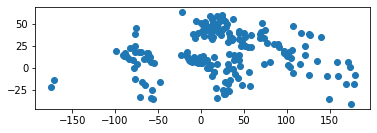

In [4]:
# Dünya başkentlerini çizdirelim.
capitals.plot();

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

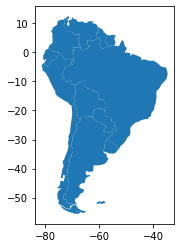

In [7]:
# Dünya ülkelerini içeren veri setinden de  Güney Amerika kıtasını dilimleyelim.
guney_amerika = world[world['continent'] == "South America"]
guney_amerika = guney_amerika[['geometry', 'name']]

guney_amerika.plot();
guney_amerika.crs

In [8]:
# Hem başkentler, hem de güney amerika veri setini, metre cinsinden ölçülen bir projeksiyona çevirelim.
guney_amerika = guney_amerika.to_crs({'init': 'epsg:3395'}) 
capitals = capitals.to_crs({'init': 'epsg:3395'})

C:\Users\ACER\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


İlk olarak başkentlerin 500 km'lik çevresine denk gelen alanın, Güney Amerika haritası ile kesiştirilmesini sağlayalım.

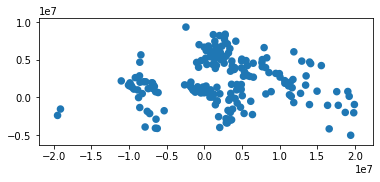

In [9]:
# Başkentlerin üzerine 500 km'lik tamponlar oluşturalım
capitals['geometry']= capitals.buffer(500000)
capitals.plot();

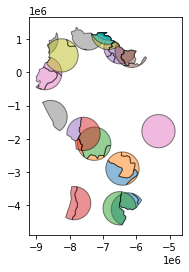

In [10]:
# Bu başkent tamponlarını, güney amerika veri seti ile üst üste bindirelim. 
# Bindirme işlemini kümelerin kesişimi yöntemi ile sağlayalım (how = intersection)
# Bindirilen her noktaya ayrı bir renk skalası uygulayalım (cmap)

guney_amerika_cores = gpd.overlay(guney_amerika, capitals, how='intersection')

guney_amerika_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');

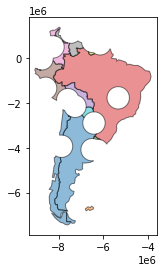

In [11]:
# Üst üste bindirme işlemini farklı yöntemlerle de yapabiliriz. Örneğin, başkentin 500 km'lik çevresinin "haricinde" kalan
# alanları da çıkarabilmemiz mümkündür. Bunun için kümeler teorisindeki "fark" (how = difference) işlemini ele alalım. 
guney_amerika_peripheries = gpd.overlay(guney_amerika, capitals, how='difference')

guney_amerika_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10');